# Lab. Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

---

In [3]:
# mount drive to the notebook

#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform 

# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



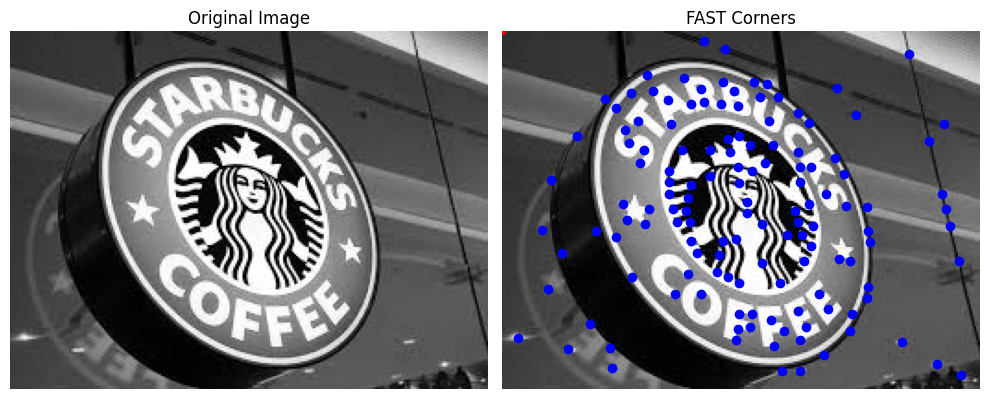

In [5]:
# solution
from skimage.feature import corner_fast, corner_peaks
from skimage.color import rgb2gray
from skimage import io

image = io.imread('images/starbucks/starbucks4.jpg', as_gray=True)
fast_corners = corner_fast(image, n=12, threshold=0.1)

corner_response = corner_fast(image, n=12, threshold=0.1)
peaks = corner_peaks(corner_response, min_distance=5)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax.axis('off')
ax = axes[1]
ax.imshow(image, cmap='gray')
ax.plot(fast_corners[:, 1], fast_corners[:, 0], 'r.', markersize=3)
ax.set_title('FAST Corners')
ax.axis('off')

ax.plot(peaks[:, 1], peaks[:, 0], 'b.', markersize=10, mew=2)

plt.tight_layout()
plt.show()


*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

Higher threshold values result in fewer detected features.

*   Repeat the exercise by replacing FAST corners with Harris corners.

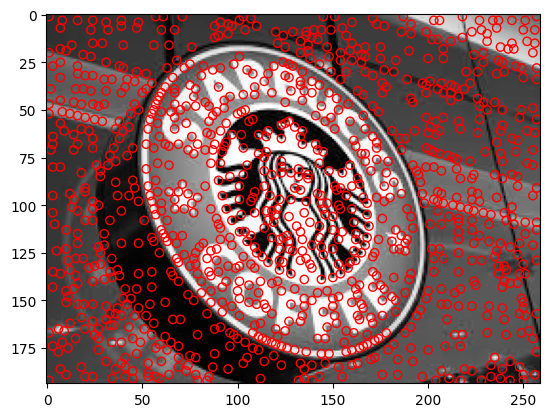

In [6]:
# solution
harris_corners= feature.corner_harris(image)

corner_points = feature.corner_peaks(harris_corners)
plt.imshow(image, cmap=plt.cm.gray)
plt.scatter(corner_points[:, 1], corner_points[:, 0], facecolors='none', edgecolors='r')
plt.show()


*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

*(Double-click or enter to edit)*

...

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [7]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [8]:
from skimage.feature import orb

descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [9]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

/var/folders/0r/tspq5j2s2fv0zp31f7l4m0_c0000gn/T/ipykernel_94632/769780144.py:2: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)


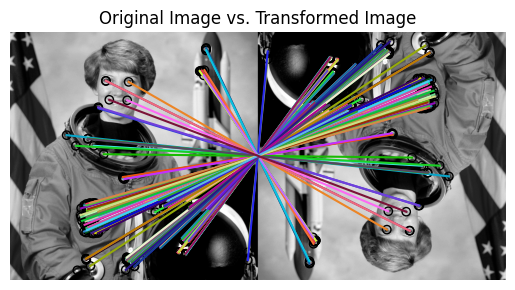

In [10]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

**Solution**

*(Double-click or enter to edit)*

...

*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [11]:
# solution
import cv2
def get_ORB(image1, image2):
    orb = cv2.ORB_create()

    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    matched_keypoints1 = np.array([keypoints1[match.queryIdx].pt for match in matches])
    matched_keypoints2 = np.array([keypoints2[match.trainIdx].pt for match in matches])

    return keypoints1, keypoints2, matched_keypoints1, matched_keypoints2, matches

*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

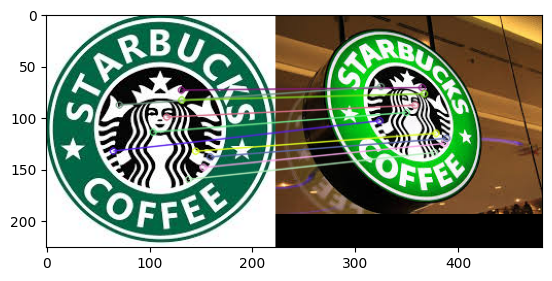

In [12]:
# solution

image1 = io.imread('images/starbucks/starbucks.jpg')
image2 = io.imread('images/starbucks/starbucks4.jpg')

keypoints1, keypoints2, matched_keypoints1, matched_keypoints2, matches = get_ORB(image1, image2)

img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.show()


### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

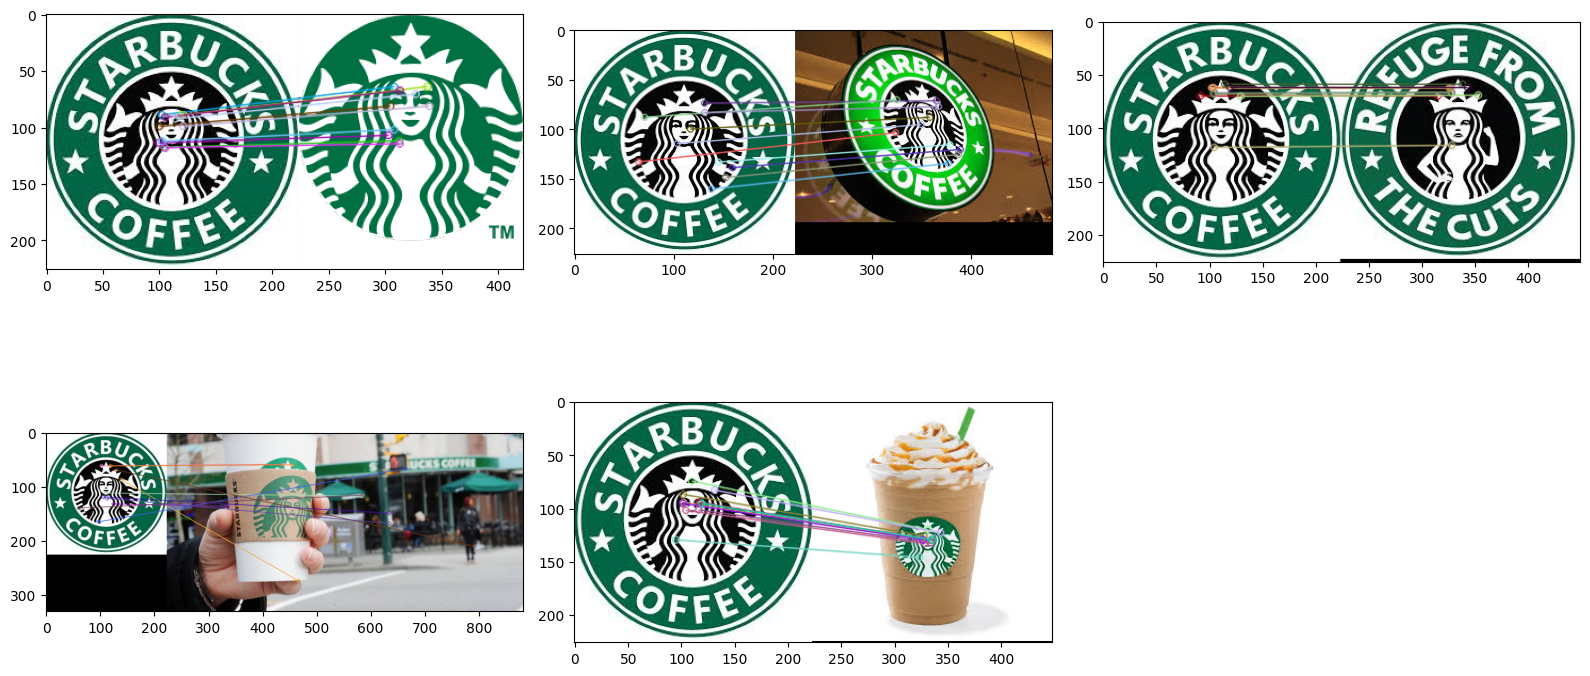

In [13]:
# solution

s0 = io.imread('images/starbucks/starbucks.jpg')
s1 = io.imread('images/starbucks/starbucks2.png')
s2 = io.imread('images/starbucks/starbucks4.jpg')
s3 = io.imread('images/starbucks/starbucks5.png')
s4 = io.imread('images/starbucks/starbucks6.jpg')
s5 = io.imread('images/starbucks/starbucksCup.jpg')

keypoints11, keypoints12, matched_keypoints11, matched_keypoints12, matches11 = get_ORB(s0, s1)
keypoints21, keypoints22, matched_keypoints21, matched_keypoints22, matches21 = get_ORB(s0, s2)
keypoints31, keypoints32, matched_keypoints31, matched_keypoints32, matches31 = get_ORB(s0, s3)
keypoints41, keypoints42, matched_keypoints41, matched_keypoints42, matches41 = get_ORB(s0, s4)
keypoints51, keypoints52, matched_keypoints51, matched_keypoints52, matches51 = get_ORB(s0, s5)

img_matches1 = cv2.drawMatches(s0, keypoints11, s1, keypoints12, matches11[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches2 = cv2.drawMatches(s0, keypoints21, s2, keypoints22, matches21[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches3 = cv2.drawMatches(s0, keypoints31, s3, keypoints32, matches31[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches4 = cv2.drawMatches(s0, keypoints41, s4, keypoints42, matches41[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches5 = cv2.drawMatches(s0, keypoints51, s5, keypoints52, matches51[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
ax[0, 0].imshow(img_matches1, cmap='gray')
ax[0, 1].imshow(img_matches2, cmap='gray')
ax[0, 2].imshow(img_matches3, cmap='gray')
ax[1, 0].imshow(img_matches4, cmap='gray')
ax[1, 1].imshow(img_matches5, cmap='gray')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()


*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

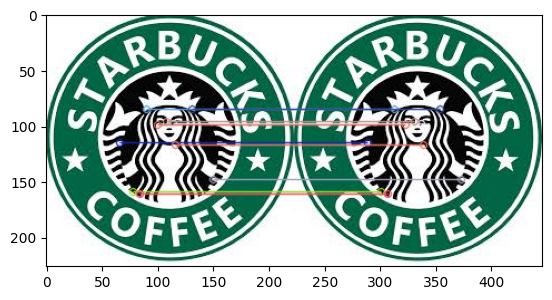

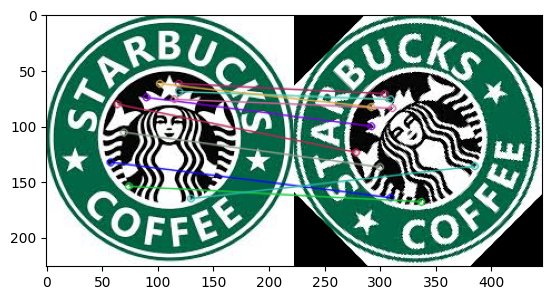

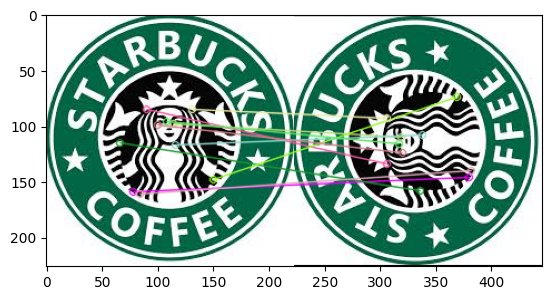

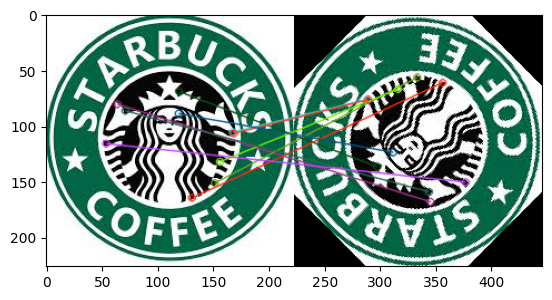

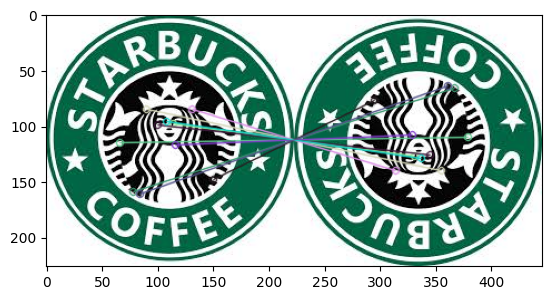

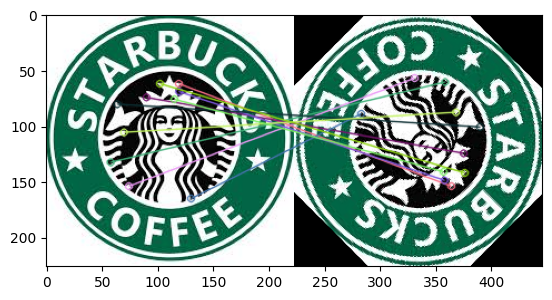

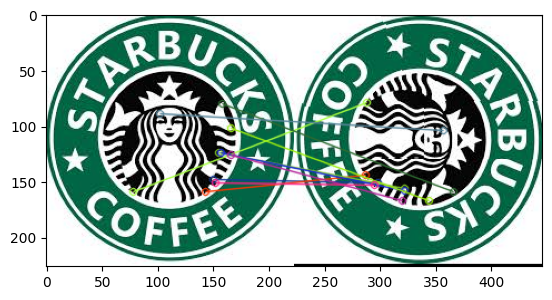

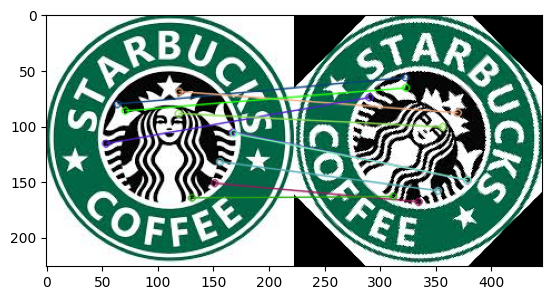

In [22]:
# solution
# from skimage import io
image1 = io.imread('images/starbucks/starbucks.jpg')

for i in [0, 45, 90, 135, 180, 225, 270, 315]:
    image2 = transform.rotate(image1, i, order=0)
    keypoints1, keypoints2, matched_keypoints1, matched_keypoints2, matches = get_ORB(image1, image2)
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img_matches)
    plt.show()

*   What do you observe with respect to the change in orientations?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

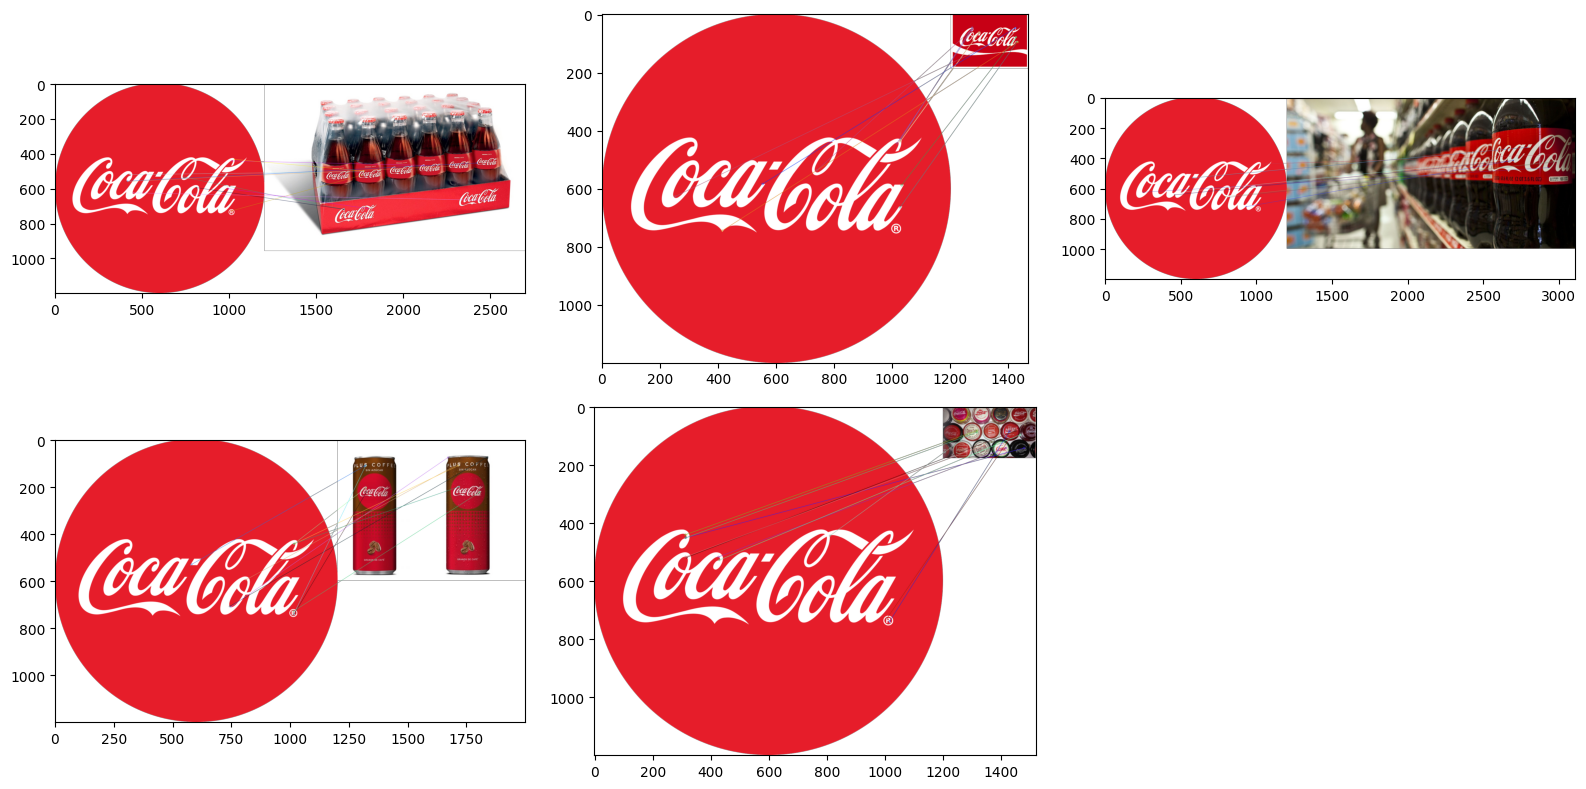

In [24]:
# solution

s0 = io.imread('images/cocacola/cocacola_logo.png')
s1 = io.imread('images/cocacola/cocacola1.jpg')
s2 = io.imread('images/cocacola/cocacola2.png')
s3 = io.imread('images/cocacola/cocacola3.jpg')
s4 = io.imread('images/cocacola/cocacola4.jpg')
s5 = io.imread('images/cocacola/cocacola5.png')
s6 = io.imread('images/cocacola/cocacola6.jpg')

keypoints11, keypoints12, matched_keypoints11, matched_keypoints12, matches11 = get_ORB(s0, s1)
keypoints21, keypoints22, matched_keypoints21, matched_keypoints22, matches21 = get_ORB(s0, s2)
keypoints31, keypoints32, matched_keypoints31, matched_keypoints32, matches31 = get_ORB(s0, s3)
keypoints41, keypoints42, matched_keypoints41, matched_keypoints42, matches41 = get_ORB(s0, s4)
keypoints51, keypoints52, matched_keypoints51, matched_keypoints52, matches51 = get_ORB(s0, s5)
keypoints61, keypoints62, matched_keypoints61, matched_keypoints62, matches61 = get_ORB(s0, s6)

img_matches1 = cv2.drawMatches(s0, keypoints11, s1, keypoints12, matches11[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches2 = cv2.drawMatches(s0, keypoints21, s2, keypoints22, matches21[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches3 = cv2.drawMatches(s0, keypoints31, s3, keypoints32, matches31[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches4 = cv2.drawMatches(s0, keypoints41, s4, keypoints42, matches41[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches5 = cv2.drawMatches(s0, keypoints51, s5, keypoints52, matches51[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches6 = cv2.drawMatches(s0, keypoints61, s6, keypoints62, matches61[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
ax[0, 0].imshow(img_matches1, cmap='gray')
ax[0, 1].imshow(img_matches2, cmap='gray')
ax[0, 2].imshow(img_matches3, cmap='gray')
ax[1, 0].imshow(img_matches4, cmap='gray')
ax[1, 1].imshow(img_matches5, cmap='gray')
ax[1, 2].imshow(img_matches6, cmap='gray')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()


**Solution**

*(Double-click or enter to edit)*

...

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

*(Double-click or enter to edit)*

...

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

In [ ]:
# solution



**Solution**

*(Double-click or enter to edit)*

...

*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

*(Double-click or enter to edit)*

...

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb